In [1]:
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt

In [2]:
!pip install prophet

In [3]:
import pandas as pd
import zipfile

# Define dataset path (using raw string to avoid errors)
zip_path = r"C:\Users\tanzi\Personal Projects\Crime-analysis-and-prediction\crime-analysis-and-prediction\data\processed_bi.zip"
csv_filename = "processed_bi.csv"  # The actual CSV filename inside the ZIP

# Extract and read the dataset
with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open(csv_filename) as f:
        df = pd.read_csv(f)

# Display the first few rows
df.head()

,report_id,date_reported,time_of_occurrence,area_code,area_name,part_1_2 (crime_severity),crime_code,crime_code_description,victim_age,victim_sex,premises_description,case_status_description,location,latitude,longitude,date_of_occurrence,crime_category,victim_descent,holiday
0,200106753,2020-02-09,18:00:00,1,Central,1,330,BURGLARY FROM VEHICLE,47,Male,BUS STOP/LAYOVER (ALSO QUERY 124),Investigation Continued,1000 S FLOWER ST,34.0444,-118.2628,2020-02-08,Theft,Unknown,Holiday
1,200320258,2020-11-11,17:00:00,3,Southwest,1,480,BIKE - STOLEN,19,Unknown,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Investigation Continued,1400 W 37TH ST,34.0210,-118.3002,2020-11-04,Theft,Unknown,Working day
2,200907217,2023-05-10,20:37:00,9,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,Male,CLOTHING STORE,Investigation Continued,14000 RIVERSIDE DR,34.1576,-118.4387,2020-03-10,Theft,Unknown,Working day
3,200406391,2020-03-02,14:30:00,4,Hollenbeck,1,310,BURGLARY,27,Male,PUBLIC STORAGE,Investigation Continued,4500 HUNTINGTON DR,34.0881,-118.1877,2020-03-01,Theft,Caucasian/White,Holiday
4,200606074,2020-02-12,16:15:00,6,Hollywood,2,805,PIMPING,23,Female,STREET,Adult Arrested,HOLLYWOOD,34.1016,-118.3370,2020-02-07,Sexual Crime,Latino/Hispanic or Pacific Islander,Working day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735243 entries, 0 to 735242
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   report_id                  735243 non-null  int64  
 1   date_reported              735243 non-null  object 
 2   time_of_occurrence         735243 non-null  object 
 3   area_code                  735243 non-null  int64  
 4   area_name                  735243 non-null  object 
 5   part_1_2 (crime_severity)  735243 non-null  int64  
 6   crime_code                 735243 non-null  int64  
 7   crime_code_description     735243 non-null  object 
 8   victim_age                 735243 non-null  int64  
 9   victim_sex                 735243 non-null  object 
 10  premises_description       735243 non-null  object 
 11  case_status_description    735243 non-null  object 
 12  location                   735243 non-null  object 
 13  latitude                   73

In [5]:
# Convert 'date_of_occurrence' column to datetime format
df["date_of_occurrence"] = pd.to_datetime(df["date_of_occurrence"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735243 entries, 0 to 735242
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   report_id                  735243 non-null  int64         
 1   date_reported              735243 non-null  object        
 2   time_of_occurrence         735243 non-null  object        
 3   area_code                  735243 non-null  int64         
 4   area_name                  735243 non-null  object        
 5   part_1_2 (crime_severity)  735243 non-null  int64         
 6   crime_code                 735243 non-null  int64         
 7   crime_code_description     735243 non-null  object        
 8   victim_age                 735243 non-null  int64         
 9   victim_sex                 735243 non-null  object        
 10  premises_description       735243 non-null  object        
 11  case_status_description    735243 non-null  object  

In [7]:
# Aggregate crime counts per day
crime_count_df = df.groupby("date_of_occurrence").size().reset_index(name="crime_count")

In [8]:
# Rename columns to match Prophet's format
crime_count_df.rename(columns={"date_of_occurrence": "ds", "crime_count": "y"}, inplace=True)

In [9]:
# Save preprocessed dataset for tracking
crime_count_df.to_csv("dataset_crime_count.csv", index=False)

In [10]:
# Display the cleaned data
crime_count_df.head()

,ds,y
0,2020-01-01,1037
1,2020-01-02,419
2,2020-01-03,464
3,2020-01-04,440
4,2020-01-05,396


In [11]:
print(crime_count_df.describe())  # Check for negative values
print(crime_count_df.head())  # Ensure counts make sense

                        ds            y
count                 1826  1826.000000
mean   2022-07-01 12:00:00   402.652245
min    2020-01-01 00:00:00     5.000000
25%    2021-04-01 06:00:00   381.250000
50%    2022-07-01 12:00:00   428.000000
75%    2023-09-30 18:00:00   464.000000
max    2024-12-30 00:00:00  1037.000000
std                    NaN   130.815596
          ds     y
0 2020-01-01  1037
1 2020-01-02   419
2 2020-01-03   464
3 2020-01-04   440
4 2020-01-05   396


In [12]:
print(crime_count_df[crime_count_df["y"] < 0])  # Should return empty
print(crime_count_df.isnull().sum())  # Should return 0 nulls

Empty DataFrame
Columns: [ds, y]
Index: []
ds    0
y     0
dtype: int64


In [13]:
# Apply log transformation (to stabilize large values)
import numpy as np
crime_count_df["y"] = np.log1p(crime_count_df["y"])  # log(1 + y) to prevent log(0)

In [14]:
# Initialize and fit Prophet model
crime_count_df["floor"] = 0  # Minimum crime count is 0
from prophet import Prophet
model = Prophet()
model.fit(crime_count_df)

21:00:20 - cmdstanpy - INFO - Chain [1] start processing
21:00:20 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
# Define future dates (365 days ahead)
future = model.make_future_dataframe(periods=365)

In [16]:
# Ensure future data also has the floor constraint
future["floor"] = 0
# Make predictions
forecast = model.predict(future)

In [17]:
# Reverse log transformation after prediction
forecast["yhat"] = np.expm1(forecast["yhat"])  # Convert back to original scale
forecast["yhat_lower"] = np.expm1(forecast["yhat_lower"])
forecast["yhat_upper"] = np.expm1(forecast["yhat_upper"])

In [18]:
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail())

             ds       yhat  yhat_lower  yhat_upper
2186 2025-12-26  14.755238    7.975567   27.219932
2187 2025-12-27  14.440376    7.891749   25.844620
2188 2025-12-28  13.462100    7.642647   24.895128
2189 2025-12-29  13.327101    7.377572   24.391264
2190 2025-12-30  12.977450    7.247723   24.211591


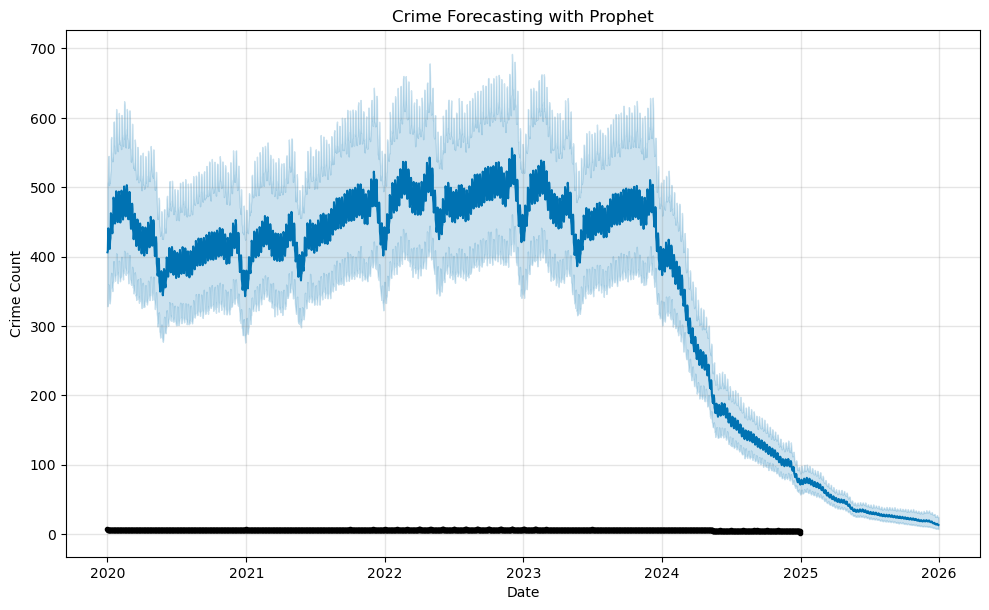

In [19]:
fig = model.plot(forecast)
plt.title("Crime Forecasting with Prophet")
plt.xlabel("Date")
plt.ylabel("Crime Count")
plt.show()

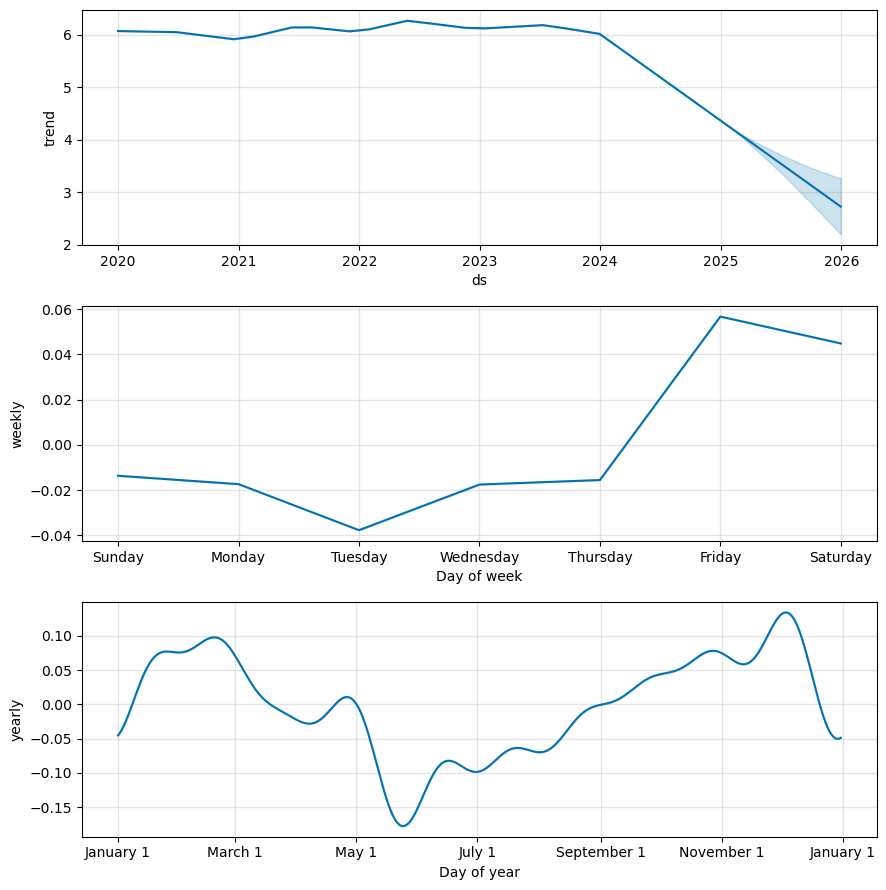

In [20]:
# Plot trend and seasonality components
fig2 = model.plot_components(forecast)
plt.show()